# DataFrame
A 2-dimensional labeled data structure with columns of potentially different types.<br/>
Input:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

In [2]:
import seaborn as sns
import pandas as pd

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

 <b>From lists:</b>

In [4]:
list = [0, 1, 2]
df = pd.DataFrame(list)
df

,0
0,0
1,1
2,2


 <b>From matrix:</b>

In [7]:
matrix = [[0, 1, 2], [3, 4, 5]]
df = pd.DataFrame(matrix)
df

,0,1,2
0,0,1,2
1,3,4,5


 <b>From dict of ndarrays / lists:</b>

In [53]:
dict = {1:['alfa', 'beta', 'gamma'], 2:['uno', 'dos', 'tres']}
df = pd.DataFrame(dict)
df

,1,2
0,alfa,uno
1,beta,dos
2,gamma,tres


<b>From a list of dicts:</b>

In [99]:
list = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(list)
df

,a,b,c
0,1,2,NaN
1,5,10,20.0


<b>Seleccion, agregado y borrado de columnas:</b>

In [100]:
a = df['a']
a

0    1
1    5
Name: a, dtype: int64

In [101]:
c = df.pop('c')
c

0     NaN
1    20.0
Name: c, dtype: float64

In [102]:
df

,a,b
0,1,2
1,5,10


In [10]:
df.insert(loc=2, column='c', value=['a', 'b'])
df

,0,1,c,2
0,0,1,a,2
1,3,4,b,5


<b>Cruce entre dos dataframes</b>:

In [14]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})

In [115]:
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [114]:
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


In [116]:
df = pd.merge(left_frame, right_frame, on='key', how='inner') # inner join
df

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [17]:
df = pd.merge(left_frame, right_frame, on='key', how='left') # left outer join
df

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


In [118]:
df = pd.concat([left_frame, right_frame]) # union de dos dataframes, uno sobre otro
df

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [22]:
df = pd.concat([left_frame, right_frame], axis=1) # union de dos dataframes, uno al lado de otro
df

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


<b>Titanic dataset</b>:

In [24]:
titanic = sns.load_dataset("titanic")
type(titanic)

pandas.core.frame.DataFrame

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [27]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [30]:
titanic.groupby(['sex', 'class', 'sibsp'])['survived'].aggregate('mean').unstack()

sibsp                 0         1         2      3         4    5    8
sex    class                                                          
female First   0.979592  0.950000  1.000000  1.000       NaN  NaN  NaN
       Second  0.931818  0.892857  1.000000  1.000       NaN  NaN  NaN
       Third   0.592593  0.447368  0.571429  0.125  0.333333  0.0  0.0
male   First   0.329545  0.483871  0.500000  0.000       NaN  NaN  NaN
       Second  0.118421  0.259259  0.200000    NaN       NaN  NaN  NaN
       Third   0.129630  0.222222  0.125000  0.000  0.083333  0.0  0.0

In [48]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [49]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


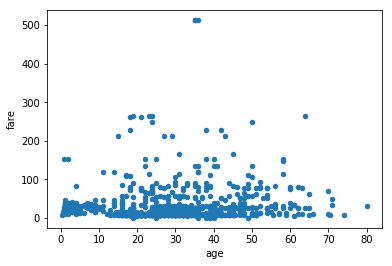

In [59]:
titanic.plot(kind='scatter', x='age', y='fare')

<b>Iris dataset</b>:

In [32]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
iris.groupby('species')[['sepal_length']].mean()

,sepal_length
species,
setosa,5.006
versicolor,5.936
virginica,6.588
